In [39]:
from skimage.io import imsave,imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
from skimage.draw import line_aa

In [40]:
from skimage.filters import prewitt_h,prewitt_v
image_normal = imread("IMD002.bmp")
image_gray = rgb2gray(image_normal)
image_x = prewitt_h(image_gray)
image_y = prewitt_v(image_gray)

Text(0.5, 1.0, 'Y')

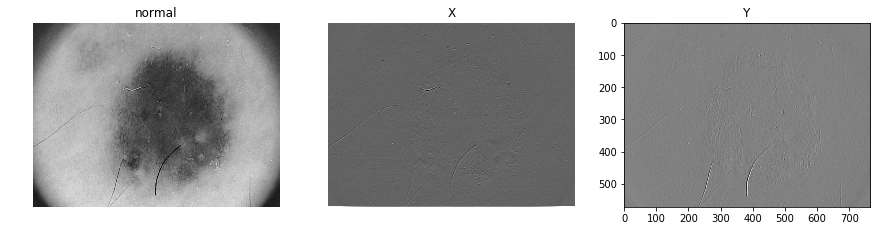

In [41]:
fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(image_gray,cmap = 'gray')
ax[0].set_title('normal')
ax[0].axis('off')
ax[1].imshow(image_x,cmap = 'gray')
ax[1].set_title('X')
ax[1].axis('off')
ax[2].imshow(image_y,cmap = 'gray')
ax[2].set_title('Y')


In [42]:
def magnitude(image, image_x, image_y):
    h,w = image.shape
    result = image.copy()
    for i in range(h):
        for j in range(w):
            result[i,j] = (image_x[i,j]**2+image_y[i,j]**2)**0.5
    return result

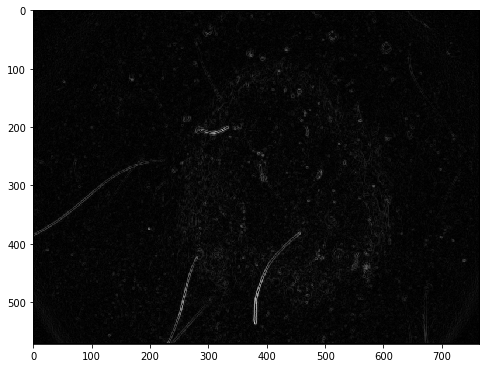

In [43]:
plt.figure(figsize=(8,8))
result = magnitude(image_gray,image_x,image_y)
plt.imshow(result,cmap='gray')

In [44]:
def gera_bloco_dbz_gt(image,image_x,image_y):
    h,w = image.shape
    orientacion = image.copy()
    for i in range(h):
        for j in range(w):
            orientacion[i,j] = np.arctan2(image_x[i,j],image_y[i,j])
    return orientacion

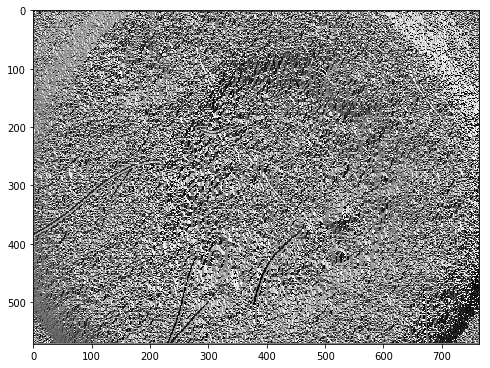

In [45]:
orientacion = gera_bloco_dbz_gt(image_gray,image_x,image_y)
plt.figure(figsize=(8,8))
plt.imshow(orientacion,cmap='gray')

In [48]:
def HOG_draw_vector(image_normal,image, window_size=3):
    h,w = image.shape
    vectors = image_normal.copy()
    xc,yc = window_size//2,window_size//2
    
    for i in range(window_size,h-window_size,window_size):
        for j in range(window_size,w-window_size,window_size):
            
            values = orientacion[i-yc:i+yc:,j-xc:j+xc]
            max_angle = np.where(values<0,2*np.pi+values,values).max()
            x,y,val = line_aa(i+yc,j+xc,int(i+yc-yc*np.sin(max_angle)),int(j+xc+xc*np.cos(max_angle)))
            vectors[x,y,:] = 255.0
    return vectors

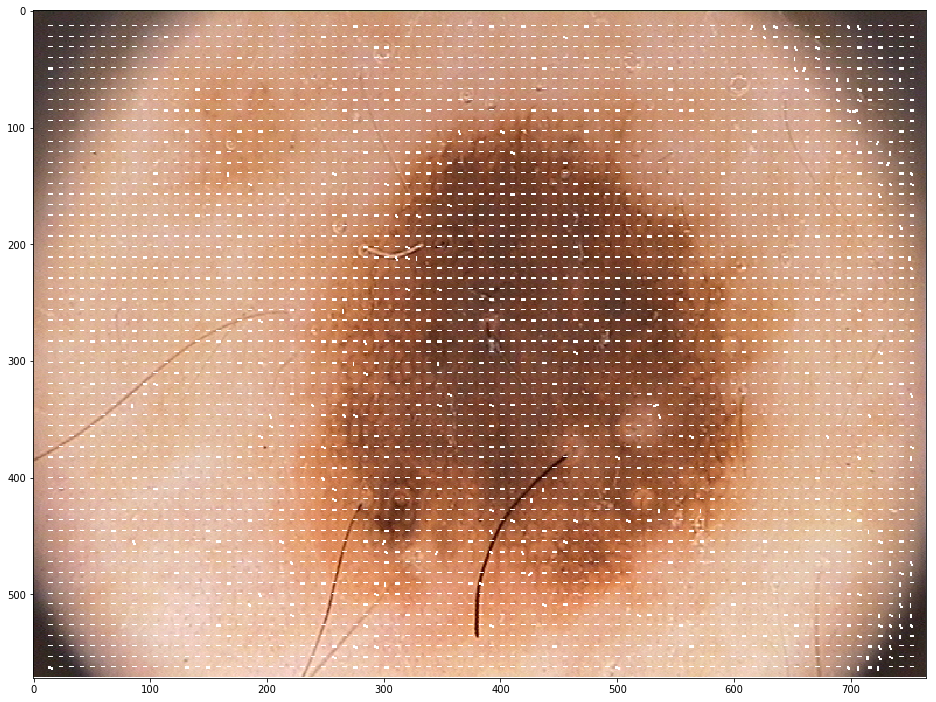

In [49]:
plt.figure(figsize=(16,16))
hog_image = HOG_draw_vector(image_normal,orientacion,9)
plt.imshow(hog_image,cmap='gray')

In [57]:
hog_vetor = np.histogram(orientacion,bins=256)[0]

In [56]:
matrix = np.zeros((100,257))

In [58]:
matrix[0,:-1] = hog_vetor

In [59]:
matrix[0,-1] = 0

In [60]:
matrix

array([[2076., 2106., 2138., ..., 2073., 2166.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])